# Выборочный метод. Первичная обработка экспериментальных данных

### Лабораторная работа №1

На одношпиндельном револьверном автомате изготовляются специальные ролики из пруткового материала. По данным фактических измерений диаметров роликов в партии деталей, изготовленных методом автоматического получения размеров, были определены отклонения размера диаметра от номинального в мм. Требуется исследовать выборку объема n=100, выбрав из таблицы полученных замеров подряд 100 чисел, начиная с номера 4N, где N – ваш порядковый номер в списке группы, построить гистограмму, полигон, кумуляту, определить характеристики отклонения  (x, (S^2^)^*^, S^2^, S, Me, Mo, A, E, V) . Выдвинуть гипотезу о законе распределения исследуемого признака. В качестве интервалов группировки возьмите интервалы: (-3;-2], (-2;-1],..., (2;3).

In [1]:
import scipy.stats as sts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
strValues = "0,414 0,011 0,666 -1,132 -0,410 -1,077 1,484 -0,340 0,789 -0,494 0,364 -1,237 -0,044 -0,111 -0,210 0,931 0,616 -0,377 -0,433 1,048 -0,037 0,759 0,609 -2,043 -2,290 0,404 -0,543 0,486 0,869 0,347 2,816 -0,464 -0,632 -1,614 0,372 -0,074 -0,916 1,314 -0,038 0,673 0,563 -0,107 0,131 -1,808 0,284 0,458 1,307 -1,625 -0,629 -0,504 -0,0056 -0,131 0,048 1,879 -1,016 0,360 -0,119 2,331 1,672 -1,053 0,840 0,246 -0,237 -1,312 1,603 -0,952 -0,566 1,600 0,465 1,951 0,110 0,251 0,116 -0,957 -0,190 1,479 -0,986 1,249 1,934 0,070 -1,358 -1,246 -0,959 -1,297 -0,722 0,925 0,783 -0,402 0,619 1,826 1,272 -0,945 0,494 0,050 -1,696 1,876 0,063 0,132 0,682 0,544 -0,417 -0,666 -0,104 -0,253 -2,543 -1,133 1,987 0,668 0,360 1,927 1,183 1,211 1,765 0,035 -0,359 0,193 -1,023 -0,222 -0,616 -0,060 -1,319 -0,785 -0,430 -0,298 0,248 -0,088 -1,379 0,295 -0,115 -0,621 -0,618 0,209 0,979 0,906 -0,096 -1,376 1,047 -0,872 -2,200 -1,384 1,425 -0,812 0,748 -1,095"

values = np.array(strValues.replace(",", ".").split(" ")).astype(float)
myN = 4 #Мой порядковый номер

data = values[4*myN-1 : 4*myN+99] #100 значений
#print(data)
#minX = min(data)
#maxX = max(data)
dataS = pd.Series(values[4*myN-1 : 4*myN+99])

dataS

0     0.931
1     0.616
2    -0.377
3    -0.433
4     1.048
      ...  
95    1.183
96    1.211
97    1.765
98    0.035
99   -0.359
Length: 100, dtype: float64

In [3]:
minX = dataS.min()
maxX = dataS.max()
print(f"{minX} - минимальное значение")
print(f"{maxX} - максимальное значение")
R = maxX - minX #Размах варьирования
print(f"{R} - размах варьирования")

-2.543 - минимальное значение
2.816 - максимальное значение
5.359 - размах варьирования


### Для определения длины частичного интервала воспользуемся формулой Стерджеса:
$$h = \frac{R}{1 + 3,222\lg n} $$

In [4]:
n = len(data)
#n = len(dataS)
#Определение интервала по формуле Стерджеса
h = round(R / (1 + 3.222 * np.log10(n)), 3)
print(f"Длина частичного интервала - {h}")
xStart = minX - 0.5 * h #Начальный интервал
xEnd = xStart
#Интервалы
table = []

while xEnd - h <= maxX >= xEnd:
    xEnd += h
    table.append([float('%.3f' % (xEnd - h)), float('%.3f' % xEnd), 0])

table

Длина частичного интервала - 0.72


[[-2.903, -2.183, 0],
 [-2.183, -1.463, 0],
 [-1.463, -0.743, 0],
 [-0.743, -0.023, 0],
 [-0.023, 0.697, 0],
 [0.697, 1.417, 0],
 [1.417, 2.137, 0],
 [2.137, 2.857, 0]]

In [5]:
for i in range(n):
    for j in range(len(table)):
        if table[j][0] <= dataS[i] < table[j][1]:
            table[j][2] += 1
p = [] # Частность
for i in table:
    i.append(i[2]/n)
    p.append(i[2]/n)
table

[[-2.903, -2.183, 2, 0.02],
 [-2.183, -1.463, 5, 0.05],
 [-1.463, -0.743, 13, 0.13],
 [-0.743, -0.023, 23, 0.23],
 [-0.023, 0.697, 30, 0.3],
 [0.697, 1.417, 13, 0.13],
 [1.417, 2.137, 12, 0.12],
 [2.137, 2.857, 2, 0.02]]

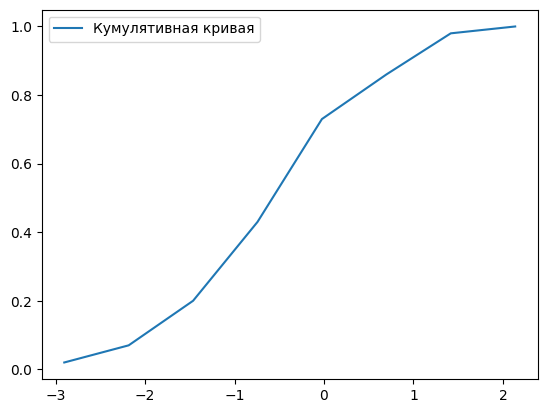

In [6]:
sum_relative = 0

for i in range(len(table)):
    if i == 0:
        table[i].append(0)
    else:
        table[i].append(float('%.4f' % sum_relative))
    sum_relative += table[i][3]

    table[i].append(float('%.3f' % (table[i][3] / h)))

plt.plot(np.arange(start=table[0][0], stop=table[len(table)-1][1], step=h), pd.Series(p).cumsum(), label='Кумулятивная кривая')
plt.legend()

In [7]:
df = pd.DataFrame(table, columns=['Начало интервала', 'Конец интервала', 'Частота', 'Частость', 'f(x)', 'F(x)'])
df

,Начало интервала,Конец интервала,Частота,Частость,f(x),F(x)
0,-2.903,-2.183,2,0.02,0.00,0.028
1,-2.183,-1.463,5,0.05,0.02,0.069
2,-1.463,-0.743,13,0.13,0.07,0.181
3,-0.743,-0.023,23,0.23,0.20,0.319
4,-0.023,0.697,30,0.30,0.43,0.417
5,0.697,1.417,13,0.13,0.73,0.181
6,1.417,2.137,12,0.12,0.86,0.167
7,2.137,2.857,2,0.02,0.98,0.028


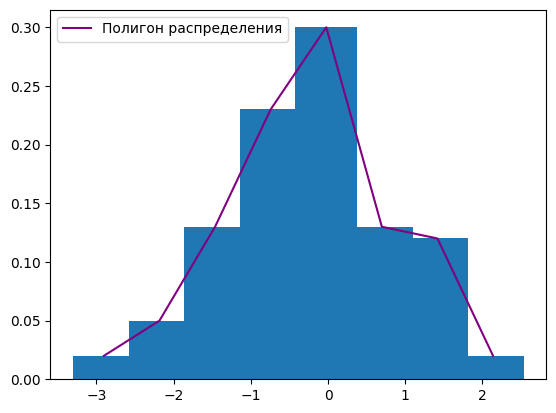

In [8]:
plt.plot(df['Начало интервала'], df['Частость'], color='purple', label='Полигон распределения') #Полигон распределения
plt.bar(df['Начало интервала'], df['Частость']) #Гистограмма распределения
plt.legend()

,Частота,Частость
Интервал,,
"(-3, -2]",3,0.03
"(-2, -1]",11,0.11
"(-1, 0]",30,0.30
"(0, 1]",35,0.35
"(1, 2]",19,0.19
"(2, 3]",2,0.02


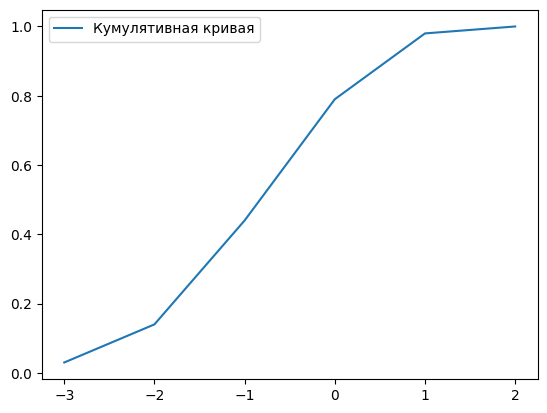

In [9]:
interval_range = pd.interval_range(start=-3, end=3)
a = pd.DataFrame({'Частота':dataS})
a['Интервал'] = pd.cut(a['Частота'], bins=interval_range, labels=[1, 2, 3])

df_grp = a.groupby('Интервал').count()
df_grp = df_grp.assign(Частость=df_grp['Частота'] / 100)

# Кумулятивная кривая
plt.plot(np.arange(-3, 3),
         df_grp['Частость'].cumsum(), label="Кумулятивная кривая")
plt.legend()
df_grp

## Лабораторная работа 2

По выборке могут быть рассчитаны выборочные статистические характеристики (выборочные: среднее, дисперсия и т.п.), которые являются оценками соответствующих генеральных статистических характеристик (параметров распределения). Каждую выборочную характеристику также следует рассматривать как значение некоторой случайной величины, изменяющейся от выборки к выборке. При оценке числовых характеристик следует иметь в виду, что сами оценки являются случайными величинами. Важно, чтобы эти оценки обладали «хорошими» свойствами, которыми являются: состоятельность, несмещенность, эффективность, достаточность. Оценка называется состоятельной, если с увеличением объема выборки она стремится (по вероятности) к оцениваемому параметру. Оценка называется несмещенной, если ее математическое ожидание при любом объеме выборки равно оцениваемому параметру.
С учетом этих требований оценки математического ожидания, дисперсии, среднего квадратического отклонения, коэффициента вариации, третьего и четвертого центральных моментов, асимметрии и эксцесса осуществляют соответственно по формулам.

Для расчёта построим вспомогательную таблицу

In [10]:
dft = pd.DataFrame({'xi': [interval.mid for interval in df_grp.index.values],
                    'ni': df_grp['Частота'].values})
dft['xi * ni']=dft['xi'] * dft['ni']
mean = 1/dft['ni'].sum() * dft['xi * ni'].sum()  # Выборочное среднее
dft['xi - x'] = dft['xi'] - mean
dft['(xi - x)^2'] = dft['xi - x'] * dft['xi - x']
dft['(xi - x)^2 * ni'] = dft['(xi - x)^2'] * dft['ni']
dft['(xi - x)^3 * ni'] = dft['(xi - x)^2 * ni'] * dft['xi - x']
dft['(xi - x)^4 * ni'] = dft['(xi - x)^3 * ni'] * dft['xi - x']
dft

,xi,ni,xi * ni,xi - x,(xi - x)^2,(xi - x)^2 * ni,(xi - x)^3 * ni,(xi - x)^4 * ni
0,-2.5,3,-7.5,-2.62,6.8644,20.5932,-53.954184,141.359962
1,-1.5,11,-16.5,-1.62,2.6244,28.8684,-46.766808,75.762229
2,-0.5,30,-15.0,-0.62,0.3844,11.5320,-7.149840,4.432901
3,0.5,35,17.5,0.38,0.1444,5.0540,1.920520,0.729798
4,1.5,19,28.5,1.38,1.9044,36.1836,49.933368,68.908048
5,2.5,2,5.0,2.38,5.6644,11.3288,26.962544,64.170855


Для вычисления эмпирических характеристик – оценок генеральных числовых характеристик случайной величины воспользовались формулами:

### ${\overline x}^* = \frac{1}{n} \sum^v_{i = 1} x^*_i * n_i $  - выборочное среднее
### $(S^2)^* = \frac{1}{n} \sum^v_{i = 1} (x^*_i - {\overline x})^2 * n_i $ - дисперсия
### $m_3 = \frac{1}{n} \sum^v_{i = 1} (x^*_i - {\overline x})^3 * n_i $ - третий центральный момент
### $m_4 = \frac{1}{n} \sum^v_{i = 1} (x^*_i - {\overline x})^4 * n_i $ - четвертый центральный момент


In [11]:
# Выборочное среднее
x = 1/dft['xi * ni'].sum() * dft['xi - x'].sum()
# Дисперсия
S2 = 1/dft['xi * ni'].sum() * dft['(xi - x)^2 * ni'].sum()
# Третий центральный момент
m3 = 1/dft['xi * ni'].sum() * dft['(xi - x)^3 * ni'].sum()
# Четвертый центральный момент
m4 = 1/dft['xi * ni'].sum() * dft['(xi - x)^4 * ni'].sum()
print(f"{x} - Выборочное среднее\n{S2} - Дисперсия\n{m3} - Третий центральный момент\n{m4} - Четвертый центральный момент")

-0.06000000000000005 - Выборочное среднее
9.463333333333333 - Дисперсия
-2.4212000000000033 - Третий центральный момент
29.613649333333342 - Четвертый центральный момент


Введем поправку для эмпирической дисперсии, вычислив несмещенную эмпирическую дисперсию:

In [12]:
# Несмещенная эмпирическая дисперсия
S2n = (dft['xi * ni'].sum()/(dft['xi * ni'].sum() - 1)) * S2
# Среднее квадратическое отклонение
s = S2 ** (0.5)
# Выборочное среднее квадратическое отклонение
s2 = S2n ** (0.5)
print(f"{S2n} - Несмещенная эмпирическая дисперсия\n{s} - Среднее квадратическое отклонение\n{s2} - Выборочное среднее квадратическое отклонение")

10.323636363636362 - Несмещенная эмпирическая дисперсия
3.07625313219399 - Среднее квадратическое отклонение
3.213041606272219 - Выборочное среднее квадратическое отклонение


Медиана $Ме$ – центр распределения, точка, которая делит площадь гистограммы пополам. Кроме того, медиана – это такое значение $х$, для которого $F(х) = 0,5$. Для вычисления медианы группированного распределения воспользуемся формулой:
## $Me = L + i(\frac{\frac {n + 1}{2} - F}{f})$
, где $L$ – нижняя граница интервала, в котором находится медиана (медианный интервал),
$i$ – величина медианного интервала,
$n$ - объем выборки,
$f$- частота медианного интервала,
$F$ - накопленная частота интервала, предшествующему медианному. Имеем:

In [13]:
L = df_grp['Частота'].idxmax().left
i = df_grp['Частота'].idxmax().length
n = dft['xi * ni'].sum()
F = df_grp['Частота'].cumsum().loc[pd.Interval(left=L, right=L+i)]
f = df_grp['Частота'].max()
median = L + i * ((n+1)/2 - F)/f

print(f"{median} - Медиана")

-2.0714285714285716 - Медиана


Мода $Мо$ – значение случайной величины, для которой вероятность (плотность распределения) максимальна. Для группированного распределения $Мо$ вычисляется по формуле:
## $Mo = L + i * \frac {f_{mo} - f_{mo-1}}{(f_{mo} - f_{mo-1})+(f_{mo} - f_{mo+1})}$
, где $L$ - нижняя граница модального интервала,
$i$ - величина модального интервала,
$f_{mo}$, $f_{mo-1}$, $f_{mo+1}$ частота модального, предшествующего модальному и следующего за модальным интервала.

In [14]:
f_mo = df_grp['Частота'][pd.Interval(left=L, right=L+i)]
f_mo1 = df_grp['Частота'][pd.Interval(left=L-i, right=L)]
f_mo2 = df_grp['Частота'][pd.Interval(left=L+i, right=L+2*i)]
mode = L + i * ((f_mo - f_mo1)/((f_mo - f_mo1) + (f_mo - f_mo2)))
print(f"{mode} - мода")

0.23809523809523808 - мода


Наиболее часто встречающееся значение ряда – 0.238.

### $A = \frac {m_3}{S^3}$ - Коэффициент асимметрии
### $E = \frac {m_4}{S^4} - 3$ - Эксцесс
### $V = \frac{S}{\overline x}$ - коэффициент вариации

In [15]:
A = m3 / (s2 ** (3))  # Коэффициент асимметрии
E = m4 / (s2 ** (4))  # Эксцесс
V = s2 / mean  # Коэффициент вариации
print(f"{A} - Коэффициент асимметрии\n{E} - Эксцесс\n{V} - Коэффициент вариации")

-0.07299306785930838 - Коэффициент асимметрии
0.2778603203224119 - Эксцесс
26.77534671893516 - Коэффициент вариации
